In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16,8)
plt.style.use("fivethirtyeight")

In [2]:
df_train = pd.read_csv('heart.csv')
df_test = pd.read_csv('o2Saturation.csv')

In [3]:
df_train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df_train.shape

(303, 14)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Checking null values 
df_train.isnull().sum().sort_values(ascending = False)

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
df_train.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df_train.duplicated().sum()

1

In [9]:
df_train.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

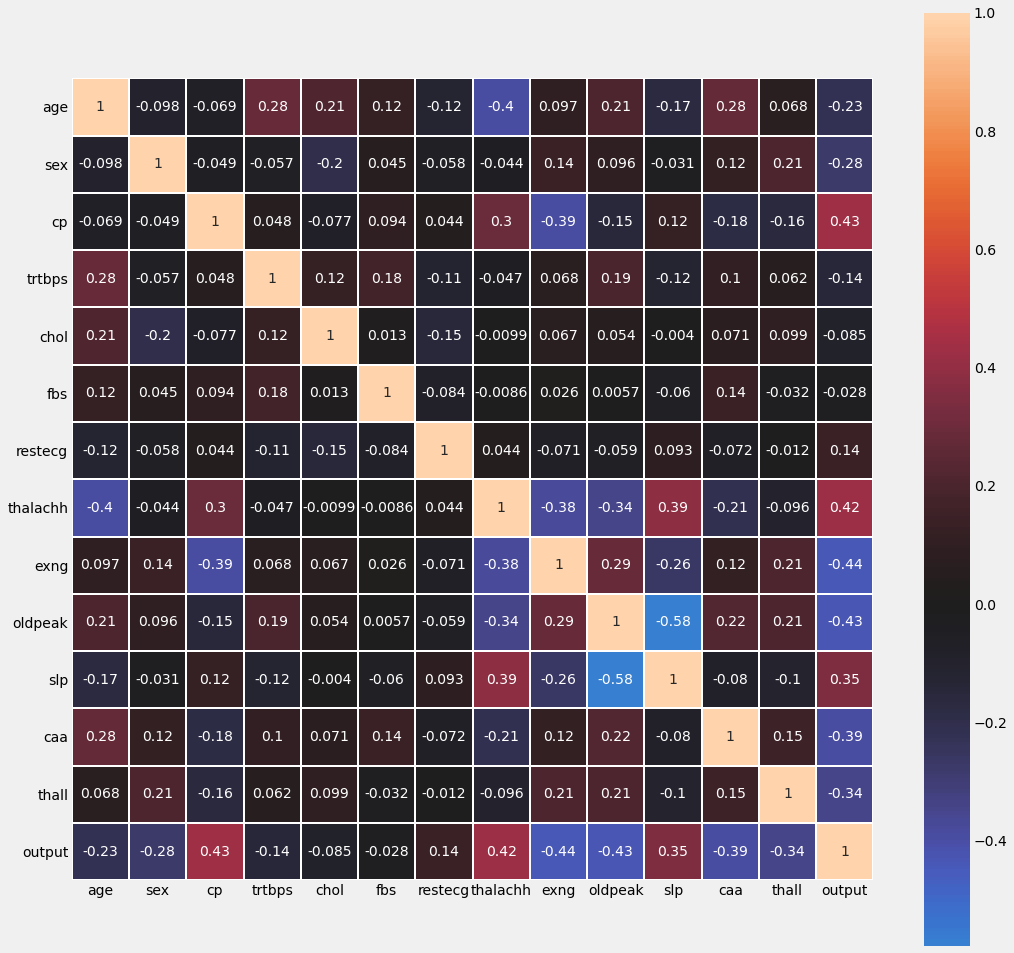

In [10]:
# Correlation
plt.figure(figsize = (16,16))
sns.heatmap(df_train.corr(),center = 0, square = True, annot =True, lw= 0.3)
plt.show()

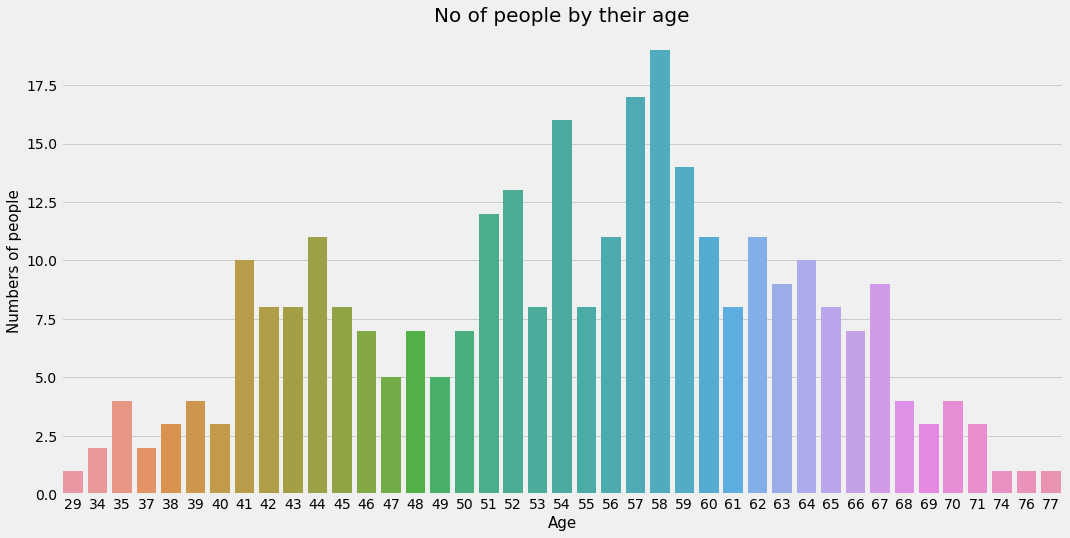

In [13]:
# now Looking at the age 
sns.countplot(x ='age', data = df_train)
plt.title('No of people by their age', fontsize = 20)
plt.xlabel('Age',fontsize =15 )
plt.ylabel('Numbers of people',fontsize =15 )
plt.show()

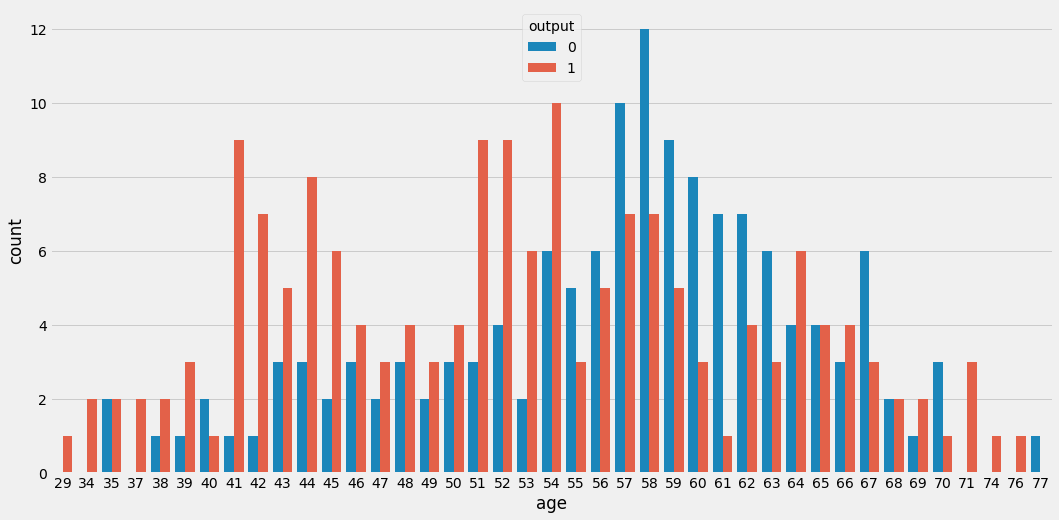

In [14]:
# countplot of age with respect to output

sns.countplot(x = df_train['age'],hue=df_train['output']);

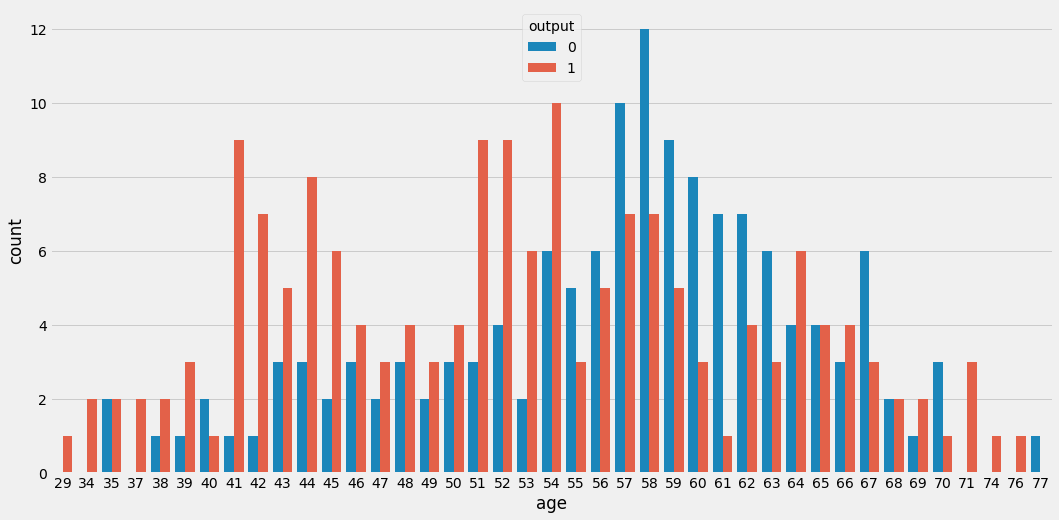

In [15]:
# countplot of age with respect to output

sns.countplot(x = df_train['age'],hue=df_train['output']);

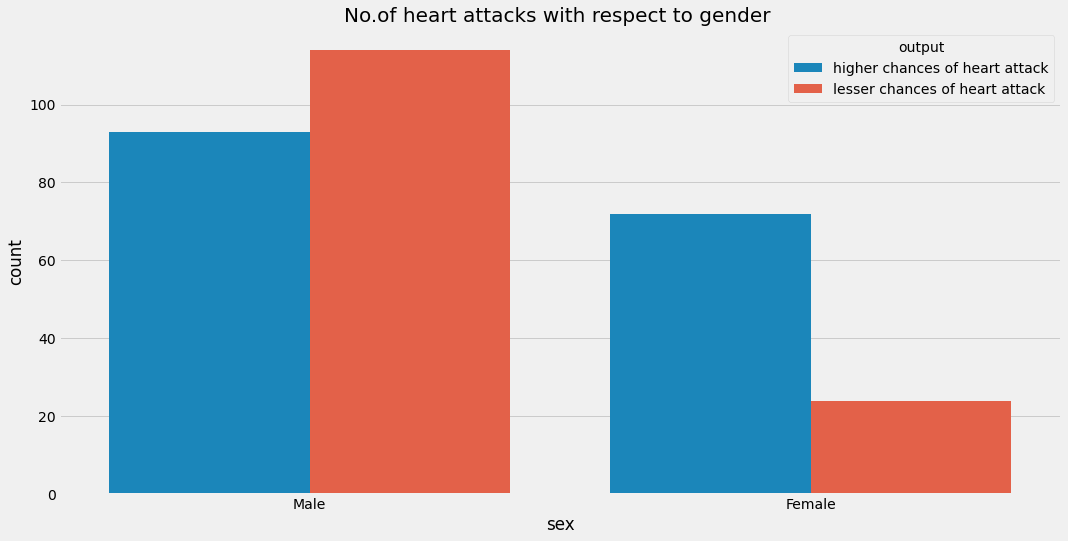

In [16]:
sex_data = df_train.sex.map({1: 'Male', 0: 'Female'})
target_data = df_train.output.map({1: 'higher chances of heart attack', 0: 'lesser chances of heart attack'})
sns.countplot(hue = target_data, x = sex_data, data = df_train)
plt.title("No.of heart attacks with respect to gender ", fontsize = 20);

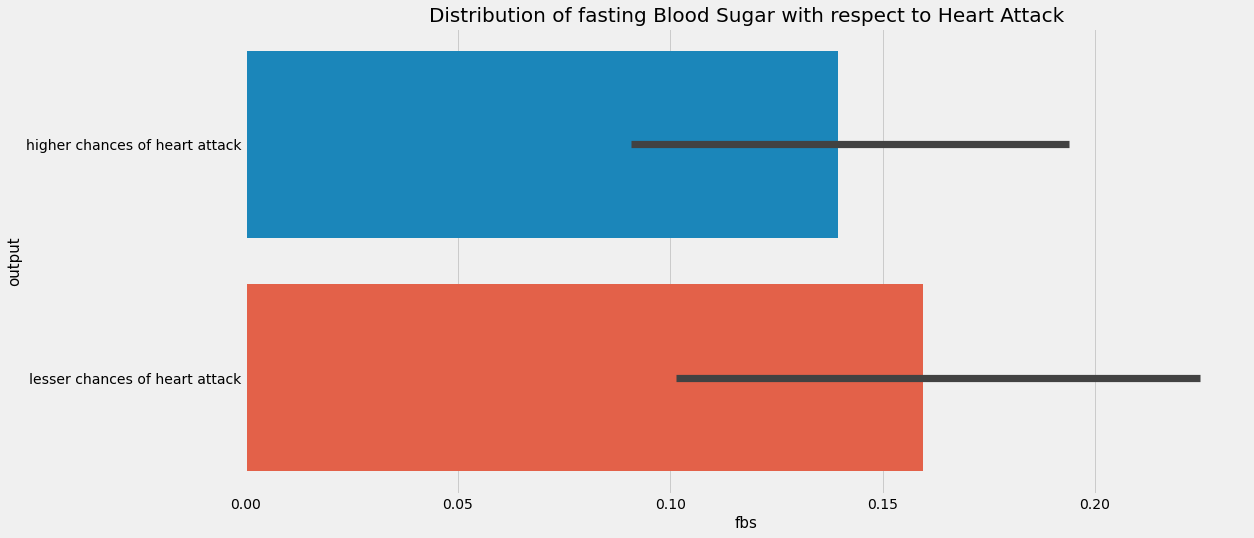

In [17]:

target_data = df_train.output.map({1: 'higher chances of heart attack', 0: 'lesser chances of heart attack'})
sns.barplot(x = 'fbs',y = target_data, data = df_train)
plt.title("Distribution of fasting Blood Sugar with respect to Heart Attack" , fontsize= 20)
plt.xlabel('fbs',fontsize = 15)
plt.ylabel('output',fontsize = 15)
plt.xticks();

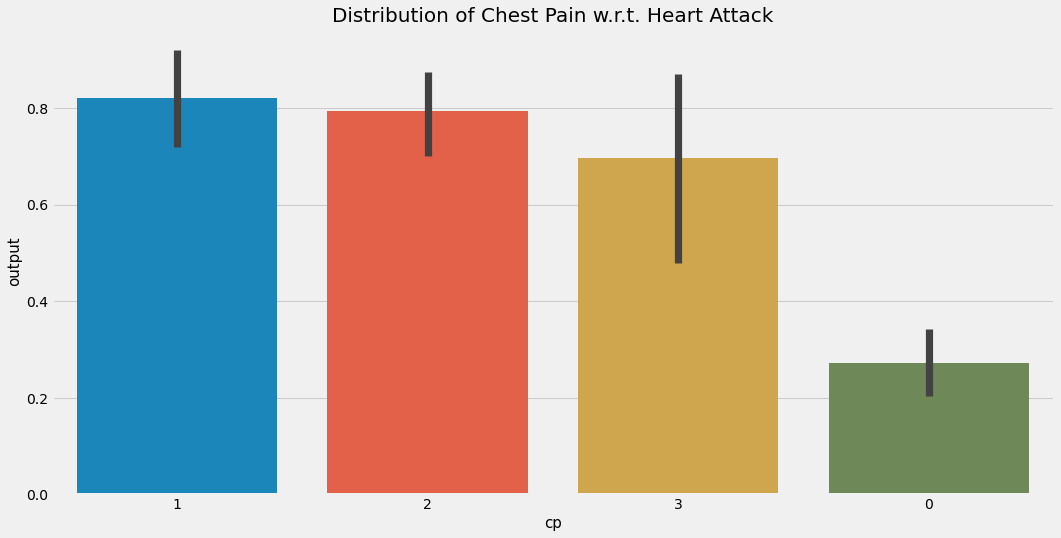

In [18]:

orders = (df_train.groupby(['cp']).mean().sort_values(by ='output', ascending = False)).index
sns.barplot(x = 'cp', y = 'output', data = df_train, order = orders)
plt.title("Distribution of Chest Pain w.r.t. Heart Attack" , fontsize= 20)
plt.xlabel('cp',fontsize = 15)
plt.ylabel('output',fontsize = 15);

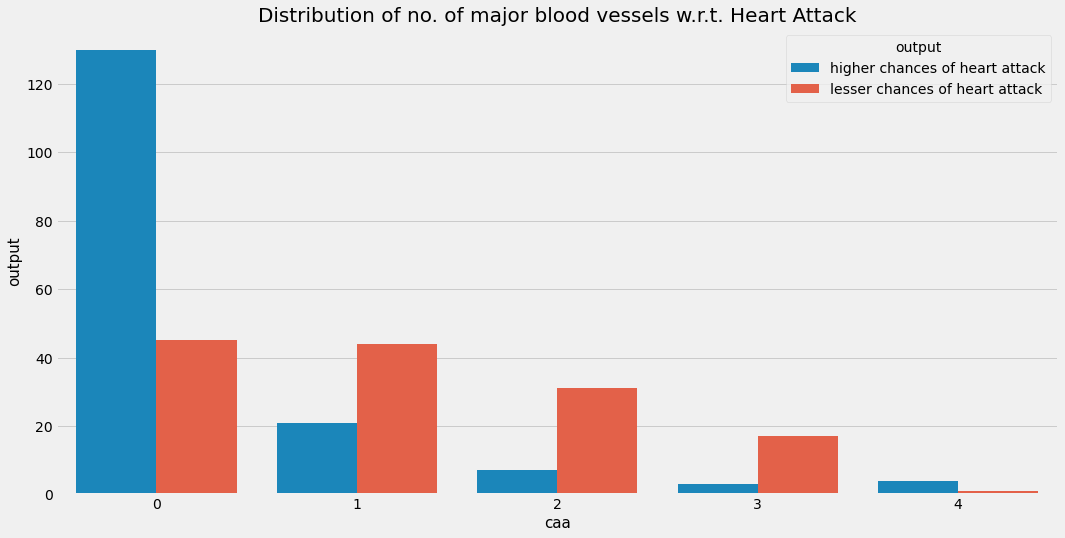

In [19]:

target_data = df_train.output.map({1: 'higher chances of heart attack', 0: 'lesser chances of heart attack'})
sns.countplot(x = 'caa', hue = target_data, data = df_train)
plt.title("Distribution of no. of major blood vessels w.r.t. Heart Attack" , fontsize= 20)
plt.xlabel('caa',fontsize = 15)
plt.ylabel('output',fontsize = 15);

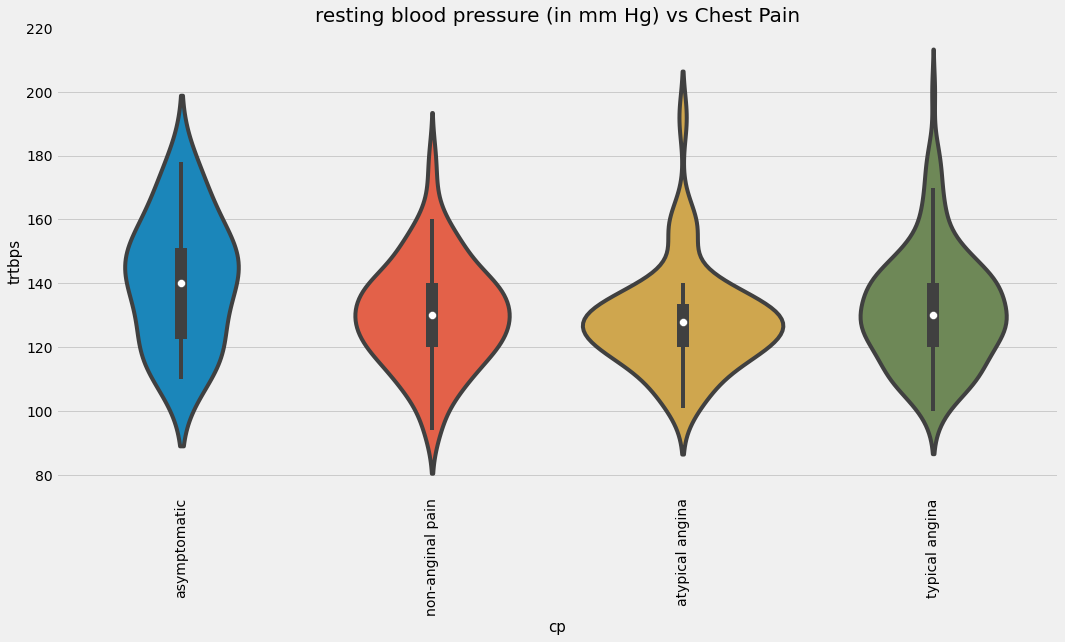

In [20]:
cp_data = df_train.cp.map({0:'typical angina',1:'atypical angina',2:'non-anginal pain',3:'asymptomatic'})
sns.violinplot(x = cp_data, y= 'trtbps', data = df_train)
plt.title('resting blood pressure (in mm Hg) vs Chest Pain', fontsize = 20)
plt.xlabel('cp',fontsize = 15)
plt.ylabel('trtbps',fontsize = 15)
plt.xticks(rotation =90)
plt.show();

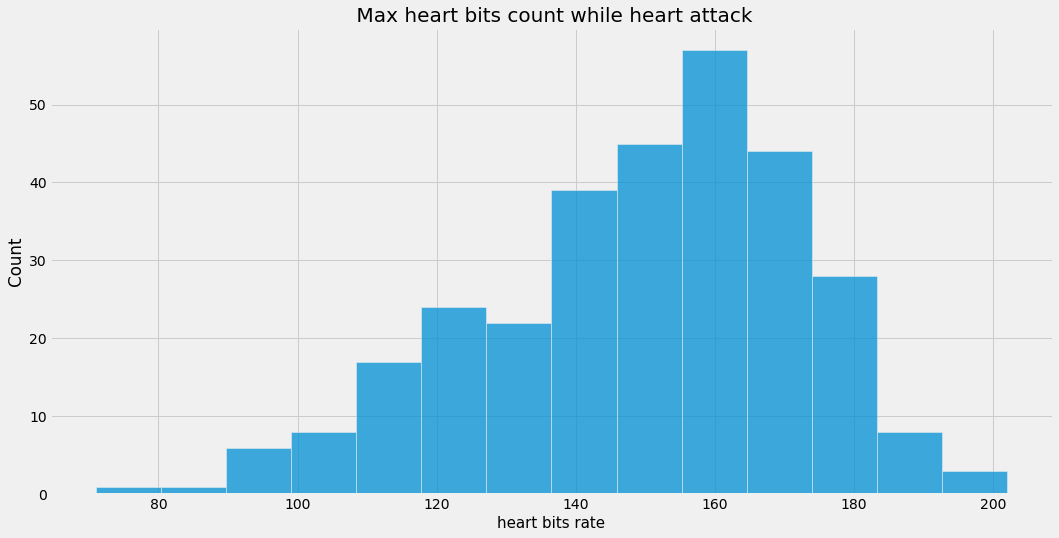

In [21]:

sns.histplot(x = 'thalachh', data = df_train)
# thalach : maximum heart rate achieved
plt.title(' Max heart bits count while heart attack', fontsize = 20)
plt.xlabel('heart bits rate', fontsize = 15);

Text(0.5, 0, 'Previous peak')

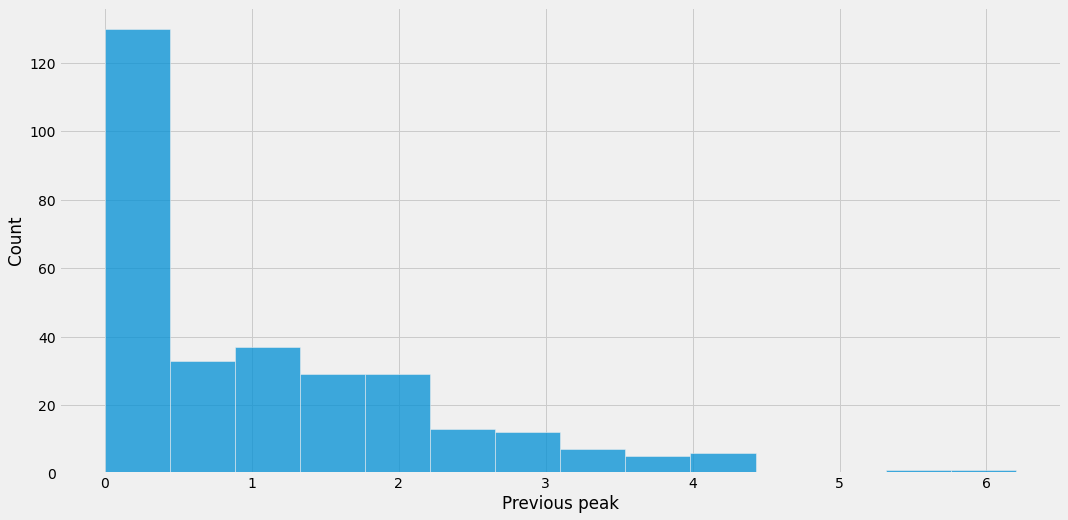

In [22]:
"""oldpeak: Previous peak"""
sns.histplot(x = 'oldpeak', data = df_train)

plt.xlabel('Previous peak')

Text(0.5, 1.0, 'No. of people who got heart attack')

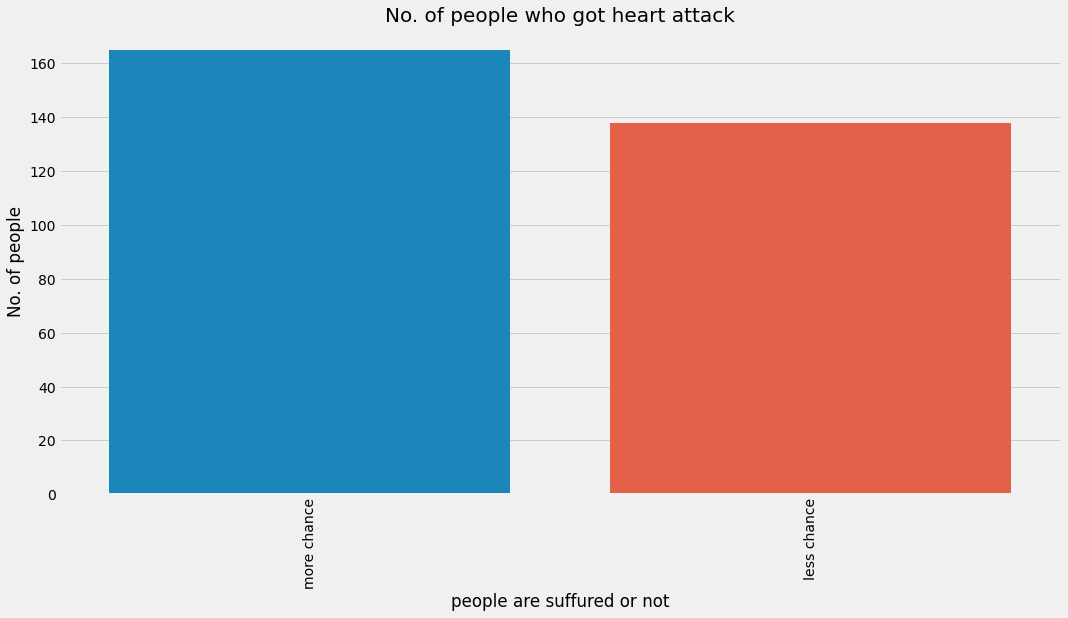

In [23]:

target_data = df_train.output.map({0:'less chance',1:'more chance'})
sns.countplot(x = target_data,data = df_train)
plt.xticks(rotation=90)
plt.ylabel('No. of people')
plt.xlabel('people are suffured or not')
plt.title('No. of people who got heart attack', fontsize = 20)

In [24]:
print(df_train['output'].value_counts())
ratio = df_train['output'].value_counts()/len(df_train['output']) *100
ratio
# below result shows 54.3% people are suffered from heart attack 
## below result shows 45.7% people are not suffered from heart attack 


1    165
0    138
Name: output, dtype: int64


1    54.455446
0    45.544554
Name: output, dtype: float64

In [ ]:
### Distribution plot of blood pressure and Cholesterol rate

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of blood pressure w.r. to intensity of blood pressure')

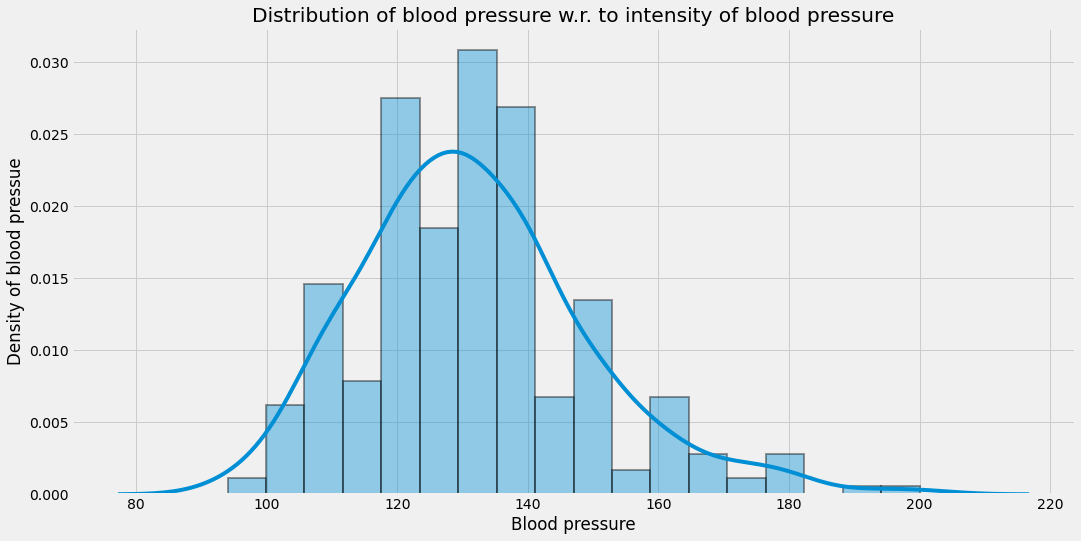

In [25]:
#blood pressure 
sns.distplot(x=df_train['trtbps'],hist_kws=dict(edgecolor="k", linewidth=2))
plt.xlabel('Blood pressure')
plt.ylabel('Density of blood pressue')
plt.title('Distribution of blood pressure w.r. to intensity of blood pressure')

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


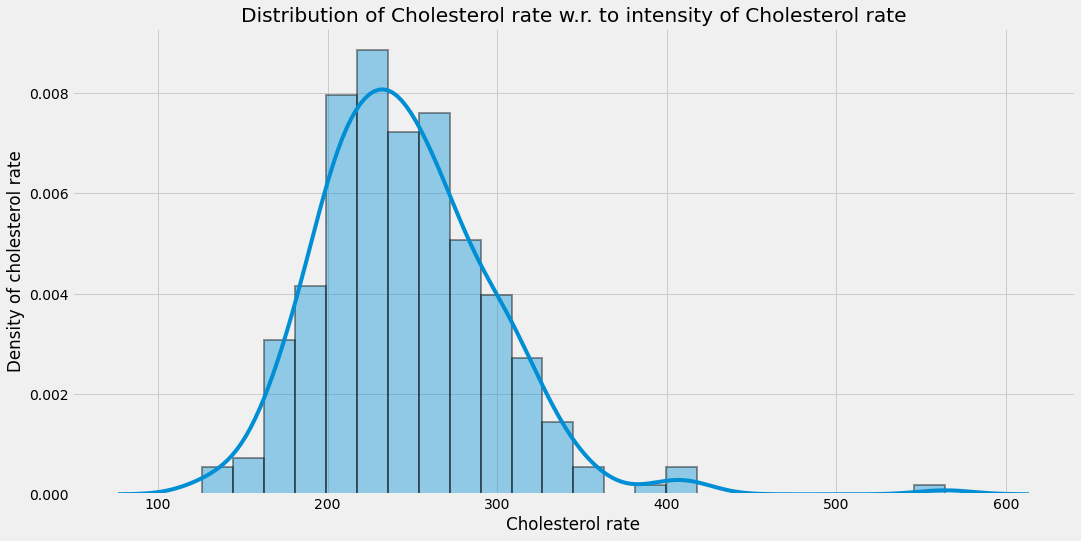

In [26]:
#cholesterol rate
sns.distplot(x= df_train['chol'],hist_kws=dict(edgecolor="k", linewidth=2))
plt.xlabel('Cholesterol rate')
plt.ylabel('Density of cholesterol rate')
plt.title('Distribution of Cholesterol rate w.r. to intensity of Cholesterol rate')
plt.show()

In [27]:
#Making list of disease
disease = ['cp','fbs','restecg','exng','slp','caa','thall']
list(enumerate(disease))

[(0, 'cp'),
 (1, 'fbs'),
 (2, 'restecg'),
 (3, 'exng'),
 (4, 'slp'),
 (5, 'caa'),
 (6, 'thall')]

In [28]:
df_train['restecg'].value_counts()
#resting electrocardiographic results
# 0 : Normal
# 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
# 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

1    152
0    147
2      4
Name: restecg, dtype: int64

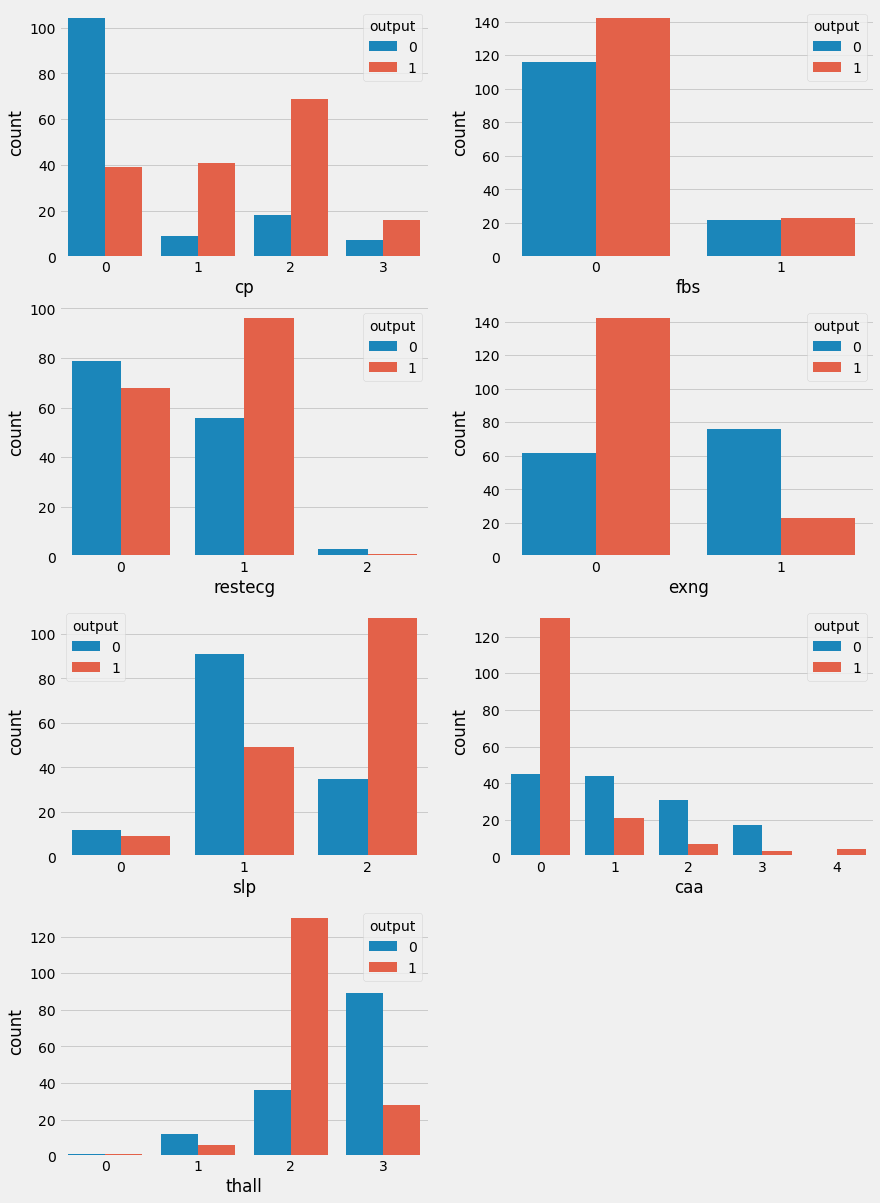

In [29]:
plt.figure(figsize = (13,30))
for i in enumerate(disease):
    plt.subplot(6,2,i[0]+1)
    sns.countplot(x=i[1], hue = 'output',data =df_train)
    
plt.show()

In [30]:
df_train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [31]:
X = df_train.iloc[:,:-1]
Y = df_train.iloc[:,-1]

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = (0.3),random_state = 5)

In [33]:
## Training Different ML Models 
### Hyperparameter tuning 

In [34]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [35]:
model_params = {'svm':{'model':svm.SVC(gamma ='auto'),'params':{"C":[1,20,40],'kernel':['rbf','linear']}},
               'random_forest':{'model':RandomForestClassifier(),'params':{'n_estimators':[1,20,40]}},
               'logistic_regression':{'model':LogisticRegression(solver = 'liblinear',multi_class ='auto',penalty='l1'),'params':{'C':[1,20,40],}}
              }
    

In [36]:
model_params.items()

dict_items([('svm', {'model': SVC(gamma='auto'), 'params': {'C': [1, 20, 40], 'kernel': ['rbf', 'linear']}}), ('random_forest', {'model': RandomForestClassifier(), 'params': {'n_estimators': [1, 20, 40]}}), ('logistic_regression', {'model': LogisticRegression(penalty='l1', solver='liblinear'), 'params': {'C': [1, 20, 40]}})])

In [37]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df2 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df2

,model,best_score,best_params
0,svm,0.774197,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.788261,{'n_estimators': 20}
2,logistic_regression,0.783610,{'C': 20}


In [38]:
model_lg = LogisticRegression(solver = 'liblinear',multi_class  = 'auto')
model_lg.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [39]:
pred = model_lg.predict(x_test)
pred

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1], dtype=int64)

In [40]:
Y.values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [41]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[39  4]
 [ 2 46]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.92      0.96      0.94        48

    accuracy                           0.93        91
   macro avg       0.94      0.93      0.93        91
weighted avg       0.93      0.93      0.93        91

